<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/IBMCloud_Runtime_Sampler_Primitives_Run_a_single_experiment_Qiskit_1_2_4_mkbahk_20241021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Install Qiskit

In [ ]:
!pip install qiskit[visualization]==1.2.4
!pip install qiskit-ibm-runtime==0.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=74cea9535c361470749785eb7757959dcc0a4bd4192e526ef18f3b3aec5f894b
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

##Step 1. Set up an Quantum Runtime Service channel

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService
#service = QiskitRuntimeService(channel="ibm_cloud", token="API-Kere is here", instance="crn is here")

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    channel="ibm_cloud",
    token="Kv7A_LE4mgRi_mSoj-Jb1uCc5Qb3ISG9_ZwG4HsXiULX",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/71306d10032b425fb301ccb4c4df2a2c:47863e1f-c767-41bd-a6e3-1a4300020bdc::",
    # Explicitly set instance to None for ibm_cloud channel
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
print(service.backends())

[<IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_statevector')>]


In [ ]:
#backend = service.backends()[0]
#backend = service.least_busy(operational=True, simulator=False)
#backend = service.backend("ibm_brisbane")
backend = service.backend("ibmq_qasm_simulator")
#backend = service.backend("simulator_statevector")
#backend = service.backend("simulator_mps")
#backend = service.backend("simulator_stabilizer")

In [ ]:
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


In [ ]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [ ]:
#n_qubits = 127
n_qubits = 20

#service = QiskitRuntimeService()
#backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)

mat = np.real(random_hermitian(n_qubits, seed=1234))
circuit = IQP(mat)
circuit.measure_all()

In [ ]:
circuit.draw("mpl")

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)

In [ ]:
isa_circuit.draw("mpl")

In [ ]:
sampler = Sampler(backend)
job = sampler.run([isa_circuit])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: csk2b2mj0jilb25obnn0


In [ ]:
print(job.status())

DONE


In [ ]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [ ]:
result = job.result()

In [ ]:
# Get results for the first (and only) PUB
pub_result = result[0]

print(f" > Counts: {pub_result.data.meas.get_counts()}")

 > Counts: {'10000001110111010001': 1, '10011000111101011001': 1, '10100011000000110000': 1, '11011000001000101010': 1, '11010111011110001111': 1, '10100101111101000011': 1, '00010100010010110100': 1, '10000101101101111100': 1, '11110111011000100101': 1, '10000011010010001110': 1, '11011110111101000000': 1, '11110011111111001100': 1, '00110000011100001110': 1, '00010011111010001010': 1, '10000100111110100111': 1, '00110111101011110100': 1, '10010110111101100000': 1, '11100011111000011010': 1, '01010101110011000000': 1, '01010000000101011011': 1, '11111111101101001101': 1, '01011111100111100011': 1, '10011111101111110101': 1, '01010011011000101001': 1, '00000001010110111111': 1, '00101010111010000000': 1, '10000001011000111001': 1, '10011010100110010101': 1, '01000001011110000000': 1, '01010011011010110101': 1, '01011111100110111100': 1, '01000100101110110111': 1, '01010111100100000100': 1, '11011011000100010001': 1, '11011000011110011101': 1, '10001011011111000010': 1, '110110101010010

In [ ]:
# 결과 출력
counts = pub_result.data.meas.get_counts()
print(counts)

{'10000001110111010001': 1, '10011000111101011001': 1, '10100011000000110000': 1, '11011000001000101010': 1, '11010111011110001111': 1, '10100101111101000011': 1, '00010100010010110100': 1, '10000101101101111100': 1, '11110111011000100101': 1, '10000011010010001110': 1, '11011110111101000000': 1, '11110011111111001100': 1, '00110000011100001110': 1, '00010011111010001010': 1, '10000100111110100111': 1, '00110111101011110100': 1, '10010110111101100000': 1, '11100011111000011010': 1, '01010101110011000000': 1, '01010000000101011011': 1, '11111111101101001101': 1, '01011111100111100011': 1, '10011111101111110101': 1, '01010011011000101001': 1, '00000001010110111111': 1, '00101010111010000000': 1, '10000001011000111001': 1, '10011010100110010101': 1, '01000001011110000000': 1, '01010011011010110101': 1, '01011111100110111100': 1, '01000100101110110111': 1, '01010111100100000100': 1, '11011011000100010001': 1, '11011000011110011101': 1, '10001011011111000010': 1, '11011010101001010001': 1, 

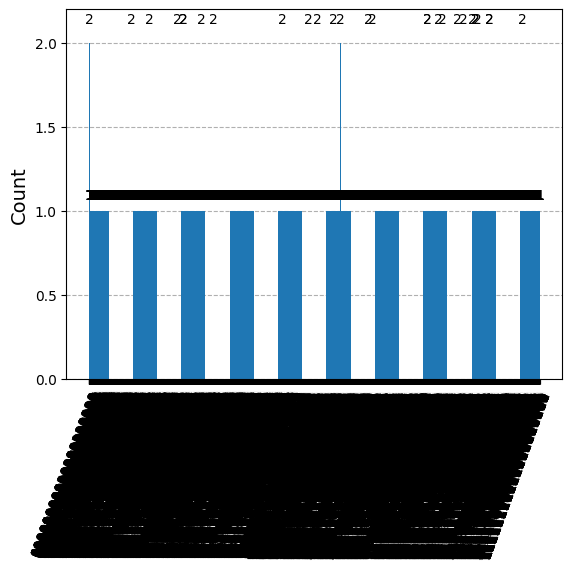

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)